In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
from scipy.spatial import Voronoi

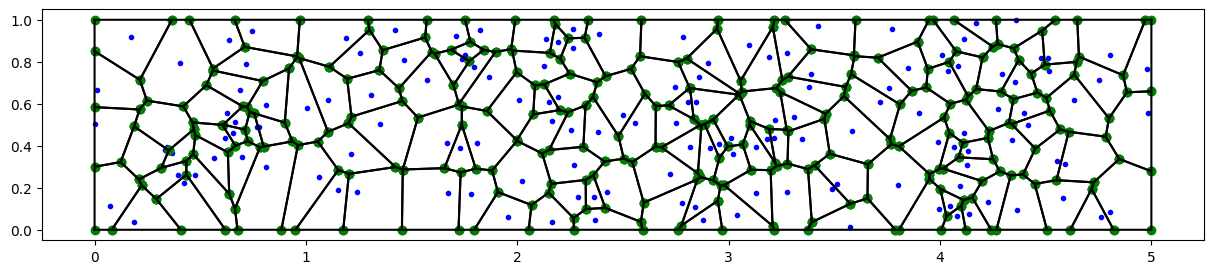

In [154]:
import matplotlib.pyplot as pl
import numpy as np
import scipy as sp
import scipy.spatial
import sys

eps = sys.float_info.epsilon

number_of_elements = 150
bounding_box = np.array([0., 5., 0., 1.])  # [x_min, x_max, y_min, y_max]
xs = np.random.uniform(bounding_box[0], bounding_box[1], number_of_elements)
ys = np.random.uniform(bounding_box[2], bounding_box[3], number_of_elements)


def in_box(towers, bounding_box):
    return np.logical_and(np.logical_and(bounding_box[0] <= towers[:, 0],
                                         towers[:, 0] <= bounding_box[1]),
                          np.logical_and(bounding_box[2] <= towers[:, 1],
                                         towers[:, 1] <= bounding_box[3]))


towers = np.vstack((xs, ys)).T


def voronoi(towers, bounding_box):
    # Select towers inside the bounding box
    i = in_box(towers, bounding_box)
    # Mirror points
    points_center = towers[i, :]
    points_left = np.copy(points_center)
    points_left[:, 0] = bounding_box[0] - (points_left[:, 0] - bounding_box[0])
    points_right = np.copy(points_center)
    points_right[:, 0] = bounding_box[1] + (bounding_box[1] - points_right[:, 0])
    points_down = np.copy(points_center)
    points_down[:, 1] = bounding_box[2] - (points_down[:, 1] - bounding_box[2])
    points_up = np.copy(points_center)
    points_up[:, 1] = bounding_box[3] + (bounding_box[3] - points_up[:, 1])
    points = np.append(points_center,
                       np.append(np.append(points_left,
                                           points_right,
                                           axis=0),
                                 np.append(points_down,
                                           points_up,
                                           axis=0),
                                 axis=0),
                       axis=0)
    # Compute Voronoi
    vor = sp.spatial.Voronoi(points)
    # Filter regions
    regions = []
    for region in vor.regions:
        flag = True
        for index in region:
            if index == -1:
                flag = False
                break
            else:
                x = vor.vertices[index, 0]
                y = vor.vertices[index, 1]
                if not (bounding_box[0] - eps <= x and x <= bounding_box[1] + eps and
                        bounding_box[2] - eps <= y and y <= bounding_box[3] + eps):
                    flag = False
                    break
        if region != [] and flag:
            regions.append(region)
    vor.filtered_points = points_center
    vor.filtered_regions = regions
    return vor


vor = voronoi(towers, bounding_box)
fig = pl.figure(figsize=(15, 3))
ax = fig.gca()
# Plot initial points
ax.plot(vor.filtered_points[:, 0], vor.filtered_points[:, 1], 'b.')
# Plot ridges points
filtered_vertices = vor.filtered_points.copy()
for region in vor.filtered_regions:
    vertices = vor.vertices[region, :]
    vertices[np.isclose(vertices, 0, atol=1e-4)] = 0
    vertices[:, 0][np.isclose(vertices[:, 0], 5, atol=1e-4)] = 5
    vertices[:, 1][np.isclose(vertices[:, 1], 1, atol=1e-4)] = 1
    vor.vertices[region, :] = vertices
    filtered_vertices = np.concatenate([filtered_vertices, vertices])
    ax.plot(vertices[:, 0], vertices[:, 1], 'go')
# Plot ridges

for region in vor.filtered_regions:
    vertices = vor.vertices[region + [region[0]], :]
    ax.plot(vertices[:, 0], vertices[:, 1], 'k-')

In [155]:
mi = 1.3
lambda_ = 0.5

mi_prime = 1.2
lambda_prime = 0.3

size_y = 4
size_x = 20

bounding_box = np.array([0, 5, 0, 1])

In [156]:
def f1(x, y):
    x = np.array(x)
    y = np.array(y)
    result = np.zeros_like(x)
    # cond = (0 <= x) & (x <= 5) & (0 <= y) & (y <= 1)
    cond = np.ones_like(x) == 1
    result[cond] = 0
    return result


def f2(x, y):
    x = np.array(x)
    y = np.array(y)
    result = np.zeros_like(x)
    # cond = (3 <= x) & (x <= 4) & (0 <= y) & (y <= 1)
    cond = np.ones_like(x) == 1
    result[cond] = 0
    return result


def fnx(x, y):
    x = np.array(x)
    y = np.array(y)
    result = np.zeros_like(x)
    if x == 5:
        result = -1
    return result


def fny(x, y):
    x = np.array(x)
    y = np.array(y)
    result = 0
    if x == 5:
        result = 0
    return result


In [50]:
# x = np.linspace(bounding_box[0], bounding_box[1], size_x + 1)
# y = np.linspace(bounding_box[2], bounding_box[3], size_y + 1)
# vertices = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])

In [157]:
vertices = vor.vertices.copy()
elements = np.array([np.array(x) for x in vor.filtered_regions])
indices = np.unique(np.hstack(elements))
vertices = vertices[indices]
for j, element in enumerate(elements):
    for i in range(len(element)):
        elements[j][i] = np.where(np.isin(indices, element[i]))[0]
    local_vertices = vertices[element]
    x = local_vertices[:, 0]
    y = local_vertices[:, 1]
    n_of_sides = len(element)
    range_plus_one = np.array([*range(1, n_of_sides), 0])
    area_part = np.array([x[i] * y[j] - x[j] * y[i] for i, j in zip(range(n_of_sides), range_plus_one)])
    area = 1 / 2 * np.sum(area_part)
    if area > 0:
        elements[j] = element[::-1]

C:\Users\pawli\AppData\Local\Temp\ipykernel_2732\377743326.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  elements = np.array([np.array(x) for x in vor.filtered_regions])


In [52]:
# vertices = np.array(sorted(vertices, key=lambda x: x[0]))

In [158]:
dirichlet_boundary = np.where(np.isclose(vertices[:, 0], bounding_box[0]))[0]
neumann_boundary = np.where(np.isclose(vertices[:, 1], bounding_box[3])
                            | np.isclose(vertices[:, 0], bounding_box[1]))[0]

contact_boundary = np.where(np.isclose(vertices[:, 1], bounding_box[2]))[0]

# elements = np.array(
#     [np.array([i, i + 1, i + 2 + size_y, i + 1 + size_y]) + (j * (size_y + 1)) for i in range(size_y) for j in
#      range(size_x)])

In [159]:
# for i, element in enumerate(elements):
#     elements[i] = element[::-1]

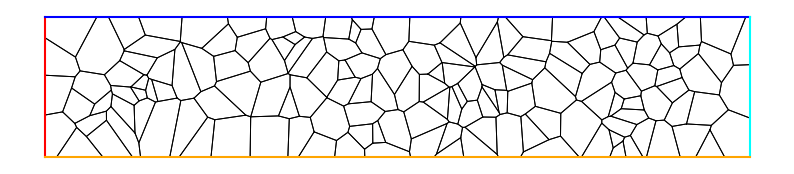

In [178]:
# for i in range(len(vertices)):
#     if vertices[i,0] not in [0,5]:
#         vertices[i,0] += np.random.uniform(-0.05,+0.05)
#     if vertices[i,1] not in [0,1]:
#         vertices[i,1] += np.random.uniform(-0.05,+0.05)

fig = plt.figure(figsize=(10, 2))
for element in elements:
    xx = [vertices[e][0] for e in element]
    xx.append(xx[0])
    yy = [vertices[e][1] for e in element]
    yy.append(yy[0])
    plt.plot(xx, yy, c="black", linewidth=0.7)
# plt.scatter(vertices[np.array(internal_vertices[internal_vertices>=len(vertices)])-len(vertices)][:,0], vertices[np.array(internal_vertices[internal_vertices>=len(vertices)])-len(vertices)][:,1])
plt.axis('off')
# plt.scatter(vertices[contact_boundary][:, 0], vertices[contact_boundary][:, 1])
# plt.show()
plt.rcParams['text.usetex'] = False
plt.plot([0,0], [0,1], c="red")
# plt.text(0,0, "ΓD", c="red")
plt.plot([0,5], [1,1], c="blue")
plt.plot([5,5], [1,0], c="cyan")
plt.plot([0,5], [0,0], c="orange")
plt.savefig("mesh.png")

In [56]:
def calculate_stiffness_matrix(vertices, elements, mi, lambda_):
    A = np.zeros((len(vertices) * 2, len(vertices) * 2))
    for element in elements:
        element = np.array(element)
        local_vertices = vertices[element]
        x = local_vertices[:, 0]
        y = local_vertices[:, 1]
        n_of_sides = len(element)
        range_plus_one = np.array([*range(1, n_of_sides), 0])
        area_part = np.array([x[i] * y[j] - x[j] * y[i] for i, j in zip(range(n_of_sides), range_plus_one)])
        area = 1 / 2 * np.sum(area_part)
        centroid = 1 / (6 * area) * np.sum([(d + d[range_plus_one]) * area_part for d in [x, y]], axis=1)
        B_snake_x = np.zeros((6, n_of_sides))
        B_snake_y = np.zeros((6, n_of_sides))

        B_snake_x[0, :] = 1
        B_snake_x[1, :] = 0
        B_snake_y[0, :] = 0
        B_snake_y[1, :] = 1
        for vertex_id in range(n_of_sides):
            vertex = local_vertices[vertex_id]
            previous_id = vertex_id - 1
            previous = local_vertices[previous_id]
            next_id = (vertex_id + 1) % n_of_sides
            next = local_vertices[next_id]
            vertex_hat_normal = -np.array([next[1] - previous[1], previous[0] - next[0]])
            B_snake_x[2, vertex_id] = -vertex[1]
            B_snake_x[3, vertex_id] = mi * vertex_hat_normal[1]
            B_snake_x[4, vertex_id] = mi * vertex_hat_normal[0]
            B_snake_x[5, vertex_id] = (mi + lambda_) * vertex_hat_normal[0]
            B_snake_y[2, vertex_id] = vertex[0]
            B_snake_y[3, vertex_id] = mi * vertex_hat_normal[0]
            B_snake_y[4, vertex_id] = -mi * vertex_hat_normal[1]
            B_snake_y[5, vertex_id] = (mi + lambda_) * vertex_hat_normal[1]

        D = np.zeros((2 * n_of_sides, 6))
        for i in range(n_of_sides):
            x = local_vertices[i, 0]
            y = local_vertices[i, 1]
            D[i] = np.array([1, 0, -y + centroid[1], y - centroid[1], x - centroid[0], x - centroid[0]])
            D[i + n_of_sides] = np.array([0, 1, x - centroid[0], x - centroid[0], -y + centroid[1], y - centroid[1]])

        B_snake = np.hstack([B_snake_x, B_snake_y])
        G_snake = B_snake @ D

        G = np.zeros((6, 6))
        G[3:, 3:] = G_snake[3:, 3:]

        projector = np.linalg.solve(G_snake, B_snake)
        Al = np.eye(2 * n_of_sides)
        part = Al - D @ projector
        stabilizing_term = part.T @ part

        local_stiffness = projector.T @ G @ projector
        local_stiffness_with_stabilizing_term = local_stiffness + stabilizing_term

        full_element = np.concatenate([element, element + len(vertices)])
        A[np.ix_(full_element, full_element)] += local_stiffness_with_stabilizing_term
    return A


def calculate_F_j(vertices, elements, fx, fy, fnx, fny):
    F = np.zeros(len(vertices) * 2)
    j = np.zeros(len(vertices) * 2)

    for element in elements:
        element = np.array(element)
        local_vertices = vertices[element]
        x = local_vertices[:, 0]
        y = local_vertices[:, 1]
        n_of_sides = len(element)
        range_plus_one = np.array([*range(1, n_of_sides), 0])
        area_part = np.array([x[i] * y[j] - x[j] * y[i] for i, j in zip(range(n_of_sides), range_plus_one)])
        area = 1 / 2 * np.sum(area_part)
        centroid = 1 / (6 * area) * np.sum([(d + d[range_plus_one]) * area_part for d in [x, y]], axis=1)
        area = np.abs(area)

        for vertex_id in range(n_of_sides):
            vertex = local_vertices[vertex_id]
            previous_id = vertex_id - 1
            previous = local_vertices[previous_id]
            next_id = (vertex_id + 1) % n_of_sides
            next = local_vertices[next_id]

            if np.isin(element[vertex_id], neumann_boundary) and np.isin(element[previous_id], neumann_boundary):
                mean_prev_vertex = (vertex[0] + previous[0]) / 2, (vertex[1] + previous[1]) / 2
                length = np.linalg.norm(vertex - previous)
                F[element[vertex_id]] += (fnx(mean_prev_vertex[0], mean_prev_vertex[1])) * length / 2
                F[element[vertex_id] + len(vertices)] += (fny(mean_prev_vertex[0], mean_prev_vertex[1])) * length / 2

            if np.isin(element[vertex_id], neumann_boundary) and np.isin(element[next_id], neumann_boundary):
                mean_next_vertex = (vertex[0] + next[0]) / 2, (vertex[1] + next[1]) / 2
                length = np.linalg.norm(vertex - next)
                F[element[vertex_id]] += (fnx(mean_next_vertex[0], mean_next_vertex[1])) * length / 2
                F[element[vertex_id] + len(vertices)] += (fny(mean_next_vertex[0], mean_next_vertex[1])) * length / 2

            if np.isin(element[vertex_id], contact_boundary) and np.isin(element[previous_id], contact_boundary):
                length = np.linalg.norm(vertex - previous)
                j[element[vertex_id]] += length / 2

            if np.isin(element[vertex_id], contact_boundary) and np.isin(element[next_id], contact_boundary):
                length = np.linalg.norm(vertex - next)
                j[element[vertex_id]] += length / 2

        F[element] += fx(centroid[0], centroid[1]) * area / n_of_sides
        F[element + len(vertices)] += fy(centroid[0], centroid[1]) * area / n_of_sides

    return F, j

In [57]:
internal_vertices = np.tile(~np.isin(np.arange(len(vertices)), dirichlet_boundary), 2)
internal_vertices[len(vertices):] = internal_vertices[len(vertices):] & (
    ~np.isin(np.arange(len(vertices)), contact_boundary))
internal_vertices = np.where(internal_vertices)[0]

In [58]:
A = calculate_stiffness_matrix(vertices, elements, mi, lambda_)
B = calculate_stiffness_matrix(vertices, elements, mi_prime, lambda_prime)
F, j = calculate_F_j(vertices, elements, f1, f2, fnx, fny)

In [59]:
u = np.zeros(len(vertices) * 2)
dt = 0.05
ut = [np.zeros_like(u)]

In [60]:
Ai = A[np.ix_(internal_vertices, internal_vertices)]
Bi = B[np.ix_(internal_vertices, internal_vertices)]
Fi = F[internal_vertices]
contact_internal_boundary = np.intersect1d(internal_vertices, contact_boundary)
non_contact_internal_boundary = np.setdiff1d(internal_vertices, contact_internal_boundary)
At = A * dt + B
Ati = At[np.ix_(internal_vertices, internal_vertices)]
Acc = At[np.ix_(contact_internal_boundary, contact_internal_boundary)]
Acn = At[np.ix_(contact_internal_boundary, non_contact_internal_boundary)]
Anc = At[np.ix_(non_contact_internal_boundary, contact_internal_boundary)]
Ann = At[np.ix_(non_contact_internal_boundary, non_contact_internal_boundary)]

A_snake = Acc - Acn @ np.linalg.solve(Ann, Anc)

Ann_v2 = np.zeros_like(A)
Ann_v2[np.ix_(non_contact_internal_boundary, non_contact_internal_boundary)] = Ann
Ann_v2[np.ix_(contact_internal_boundary, contact_internal_boundary)] = np.eye(len(contact_internal_boundary))
Ann_v2 = Ann_v2[np.ix_(internal_vertices, internal_vertices)]

Fc = F[contact_internal_boundary]
Fn = F[non_contact_internal_boundary]
F_snake = Fc - Acn @ np.linalg.solve(Ann, Fn)

Fn_v2 = np.zeros_like(F)
Fn_v2[non_contact_internal_boundary] = Fn
Fn_v2 = Fn_v2[internal_vertices]

Anc_v2 = np.zeros((A.shape[0], len(contact_internal_boundary)))
Anc_v2[contact_internal_boundary, :] = -np.eye(len(contact_internal_boundary))
Anc_v2[non_contact_internal_boundary, :] = Anc
Anc_v2 = Anc_v2[internal_vertices]

In [130]:
import autograd.numpy as np
from autograd import grad

a = 0.3
b = 0.3


def subdiff_function(v_tau):
    return np.exp(-np.abs(v_tau)) * (a - b) + np.abs(v_tau) * a


def integral(v):
    return np.sum(subdiff_function(v) * j[contact_internal_boundary])


# def Jt_snake(u_prime, u_old_full):
#     return 1/2 * (u_prime @ A_snake @ u_prime) - F_snake @ u_prime + integral(u_prime) + u_old_full @ Ai @ np.linalg.solve(Ann_v2, Fn_v2 - Anc_v2 @ u_prime)


def J_snake(u_prime, u_old_full):
    return 1 / 2 * (u_prime[internal_vertices] @ Ati @ u_prime[internal_vertices]) - Fi @ u_prime[
        internal_vertices] + integral(u_prime[contact_internal_boundary]) + u_old_full @ Ai @ u_prime[internal_vertices]


J_snake_jac = grad(J_snake)
# Jt_snake_jac = grad(Jt_snake)

In [131]:
# for v in np.random.normal(size=(12,len(contact_internal_boundary))):
#     old = np.random.normal(size=(len(internal_vertices),))
#     w = np.zeros_like(u)
#     w[contact_internal_boundary] = v
#     w[non_contact_internal_boundary] = np.linalg.solve(Ann, Fn - Anc @ v)
#     print(Jt_snake(v,old))
#     print(J_snake(w, old))
# print(1 / 2 * v @ (Acc - Acn @ np.linalg.solve(Ann, Anc)) @ v)
# print(1 / 2 * w[internal_vertices] @ Ati @ w[internal_vertices])
# print(F_snake @ v)
# print(Fi @ w[internal_vertices])

In [134]:
import scipy.optimize
from autograd import grad

ut = [np.zeros_like(u)]
for _ in range(50):
    u_old_full = ut[-1][internal_vertices]
    F_temp = F.copy()
    F_temp[internal_vertices] = Fi - u_old_full @ Ai
    Fc = F_temp[contact_internal_boundary]
    Fn = F_temp[non_contact_internal_boundary]
    F_snake = Fc - Acn @ np.linalg.solve(Ann, Fn)


    def Jt_snake(u_prime):
        return 1 / 2 * (u_prime @ A_snake @ u_prime) - F_snake @ u_prime + integral(u_prime)


    Jt_snake_jac = grad(Jt_snake)

    res = scipy.optimize.minimize(Jt_snake, ut[-1][contact_internal_boundary], jac=Jt_snake_jac, method='BFGS',
                                  options={"disp": True})

    ds = np.zeros_like(u)
    ds[contact_internal_boundary] = res.x * dt
    ds[non_contact_internal_boundary] = np.linalg.solve(Ann, Fn - Anc @ res.x) * dt
    # print(J_snake(ds,ut[-1][internal_vertices]))
    ut.append(ut[-1] + ds)


         Current function value: -0.066735
         Iterations: 130
         Function evaluations: 250
         Gradient evaluations: 242
         Current function value: -0.059736
         Iterations: 73
         Function evaluations: 173
         Gradient evaluations: 167
         Current function value: -0.053474
         Iterations: 84
         Function evaluations: 211
         Gradient evaluations: 205
         Current function value: -0.047869
         Iterations: 89
         Function evaluations: 202
         Gradient evaluations: 197
         Current function value: -0.042852
         Iterations: 117
         Function evaluations: 218
         Gradient evaluations: 214
         Current function value: -0.038360
         Iterations: 76
         Function evaluations: 181
         Gradient evaluations: 176
         Current function value: -0.034341
         Iterations: 62
         Function evaluations: 159
         Gradient evaluations: 155
         Current function value: -0.030

In [520]:

# ut = [np.zeros_like(u)]
# for _ in range(50):
#     res = scipy.optimize.minimize(J_snake, ut[-1], jac=J_snake_jac, method='BFGS',
#                                   args=ut[-1][internal_vertices].copy(), options={"disp": True})
#     ds = np.zeros_like(u)
#     ds[internal_vertices] = res.x[internal_vertices] * dt
#     ut.append(ut[-1] + ds)

In [133]:
import scipy.optimize
from autograd import grad

ut = [np.zeros_like(u)]
for _ in range(50):
    def J_snake(u_prime, u_old_full):
        return 1 / 2 * (u_prime[internal_vertices] @ Ati @ u_prime[internal_vertices]) - Fi @ u_prime[
            internal_vertices] + integral(u_prime[contact_internal_boundary]) + u_old_full @ Ai @ u_prime[
                   internal_vertices]


    J_snake_jac = grad(J_snake)

    res = scipy.optimize.minimize(J_snake, ut[-1], jac=J_snake_jac, method='BFGS', args=ut[-1][internal_vertices],
                                  options={"disp": True})
    ds = np.zeros_like(u)
    ds = res.x * dt
    ut.append(ut[-1] + ds)

         Current function value: -0.238564
         Iterations: 250
         Function evaluations: 350
         Gradient evaluations: 344
         Current function value: -0.213865
         Iterations: 269
         Function evaluations: 356
         Gradient evaluations: 352
         Current function value: -0.191727
         Iterations: 152
         Function evaluations: 214
         Gradient evaluations: 208


KeyboardInterrupt: 

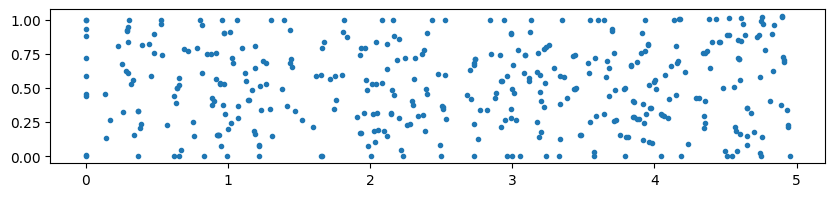

In [523]:
u = ut[4]
x = vertices[:, 0].copy()
y = vertices[:, 1].copy()
u_x = u[:len(vertices)].copy()
u_y = u[len(vertices):].copy()
x += u_x
y += u_y
# plt.set_title("Body deformation")
# plt.set_xlim(-0.5, 5.5)
plt.figure(figsize=(10, 2))
plt.scatter(x, y, marker='.', cmap='cool')

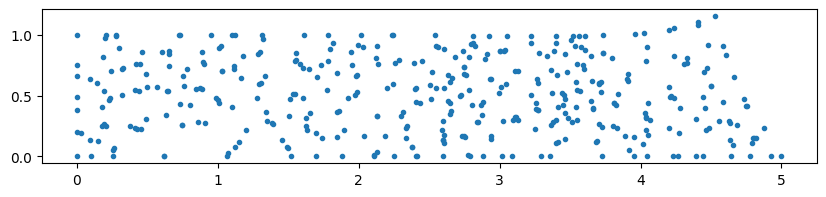

In [16]:
u = ut[50]
x = vertices[:, 0].copy()
y = vertices[:, 1].copy()
u_x = u[:len(vertices)].copy()
u_y = u[len(vertices):].copy()
x += u_x
y += u_y
# plt.set_title("Body deformation")
# plt.set_xlim(-0.5, 5.5)
plt.figure(figsize=(10, 2))
plt.scatter(x, y, marker='.', cmap='cool')


[-0.         -0.         -0.          0.00922474  0.01927158  0.02487792
  0.02613543  0.02672265  0.03206442  0.03793335  0.03878169  0.04144747
  0.05086692  0.05981819  0.06660272  0.07939569  0.09019159  0.09442695
  0.11537008  0.13419372  0.15742438  0.18726011  0.20728632  0.20536397
  0.20536397  0.23276384  0.33236793  0.27996707  0.28172705  0.30534992
  0.2832948   0.27028928  0.26577172  0.26807769  0.29027811  0.26392372
  0.28019351  0.2964633   0.31273309  0.30988363  0.2876551   0.28756285
  0.28954141  0.29251251  0.29836011  0.32183544  0.31351373  0.3076827
  0.31197287  0.33949872  0.36702458]


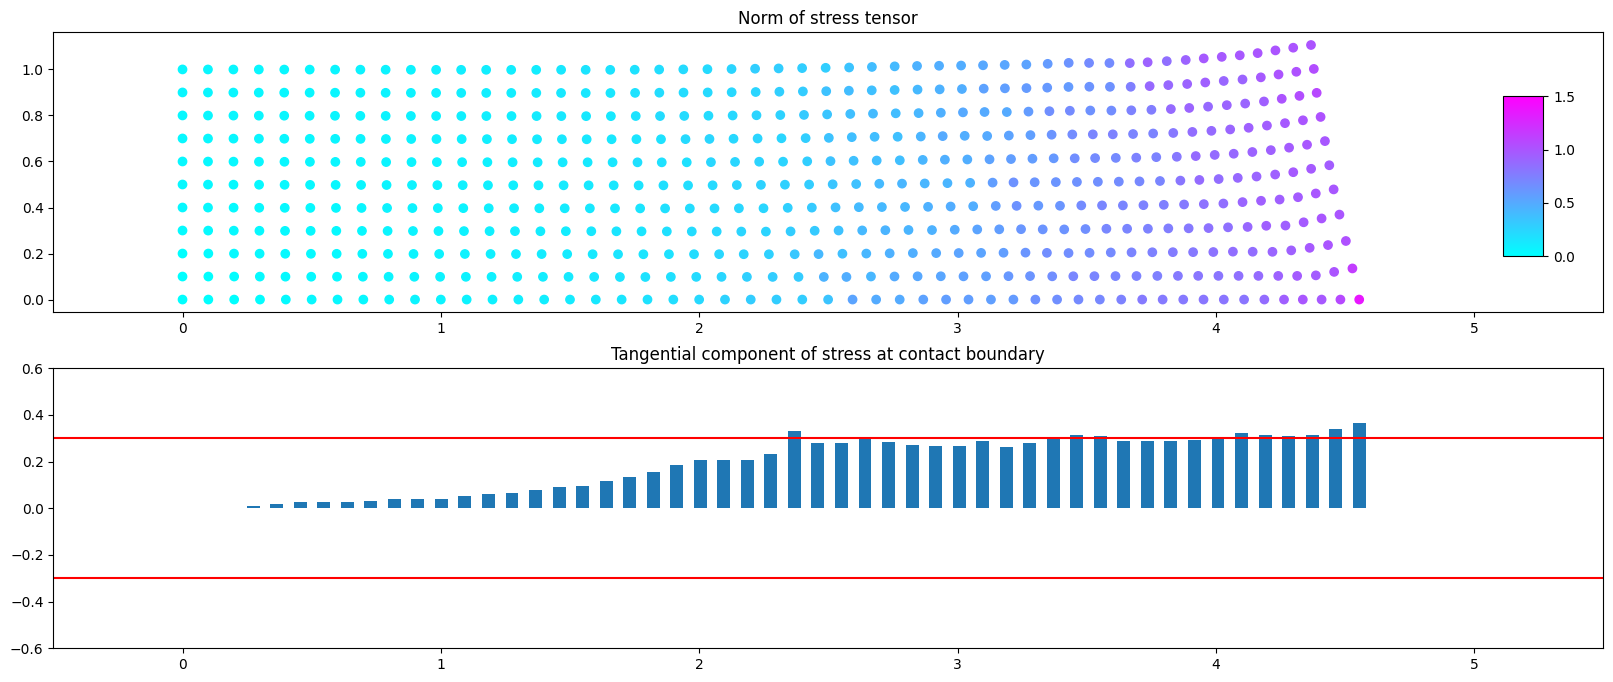

In [137]:
from matplotlib.colors import Normalize
import scipy.interpolate


def get_interpolated(u, vertices):
    x = vertices[:, 0].copy()
    y = vertices[:, 1].copy()
    u_x = u[:len(vertices)].copy()
    u_y = u[len(vertices):].copy()
    u_fun_x = scipy.interpolate.LinearNDInterpolator(list(zip(x, y)), u_x)
    u_fun_y = scipy.interpolate.LinearNDInterpolator(list(zip(x, y)), u_y)
    return u_fun_x, u_fun_y


def constitutive_law(u_x, u_y, mi, lambda_, dx, dy):
    grad_u = np.array([np.gradient(u_x, dy, dx)[::-1], np.gradient(u_y, dy, dx)[::-1]]).reshape(2, 2, -1)
    epsilon_u = (grad_u + np.transpose(grad_u, axes=(1, 0, 2))) / 2
    stress = lambda_ * np.trace(epsilon_u) * np.repeat(np.eye(2)[:, :, np.newaxis], epsilon_u.shape[2],
                                                       axis=2) + 2 * mi * epsilon_u
    return stress


t = 50
u = ut[t]
up = ut[t - 1]
fig, axs = plt.subplots(2, figsize=(20, 8))
dx = 0.1
dy = 0.1

xi, yi = np.arange(0, 5 + dx, dx), np.arange(0, 1 + dy, dy)
xxi, yyi = np.meshgrid(xi, yi)
u_fun_x, u_fun_y = get_interpolated(u, vertices)
up_fun_x, up_fun_y = get_interpolated(up, vertices)
u_xi = u_fun_x(xxi, yyi)
u_yi = u_fun_y(xxi, yyi)
w_xi = (u_xi - up_fun_x(xxi, yyi)) / dt
w_yi = (u_yi - up_fun_y(xxi, yyi)) / dt

stress = constitutive_law(u_xi, u_yi, mi, lambda_, dx, dy) + constitutive_law(w_xi, w_yi, mi_prime, lambda_prime, dx, dy)
c = np.linalg.norm(stress, axis=(0, 1))
x_new = xxi + u_xi
y_new = yyi + u_yi
axs[0].set_title("Norm of stress tensor")
axs[0].set_xlim(-0.5, 5.5)
axs[0].scatter(x_new, y_new, marker='o', cmap='cool', c=c.reshape(*xxi.shape), norm=Normalize(0, 1.5))
fig.colorbar(axs[0].collections[0], cax=fig.add_axes([0.85, 0.6, 0.02, 0.2]))
axs[1].set_title("Tangential component of stress at contact boundary")
axs[1].set_xlim(-0.5, 5.5)
axs[1].set_ylim(-0.6, 0.6)
if b != 0:
    axs[1].plot([-0.5, 5.5], [b, b], c='r')
    axs[1].plot([-0.5, 5.5], [-b, -b], c='r')
axs[1].bar(np.linspace(0, np.max(x_new), len(stress[1, 0, yyi.flatten() == 0])), -stress[1, 0, yyi.flatten() == 0], width=0.05)
print(-stress[1, 0, yyi.flatten() == 0])

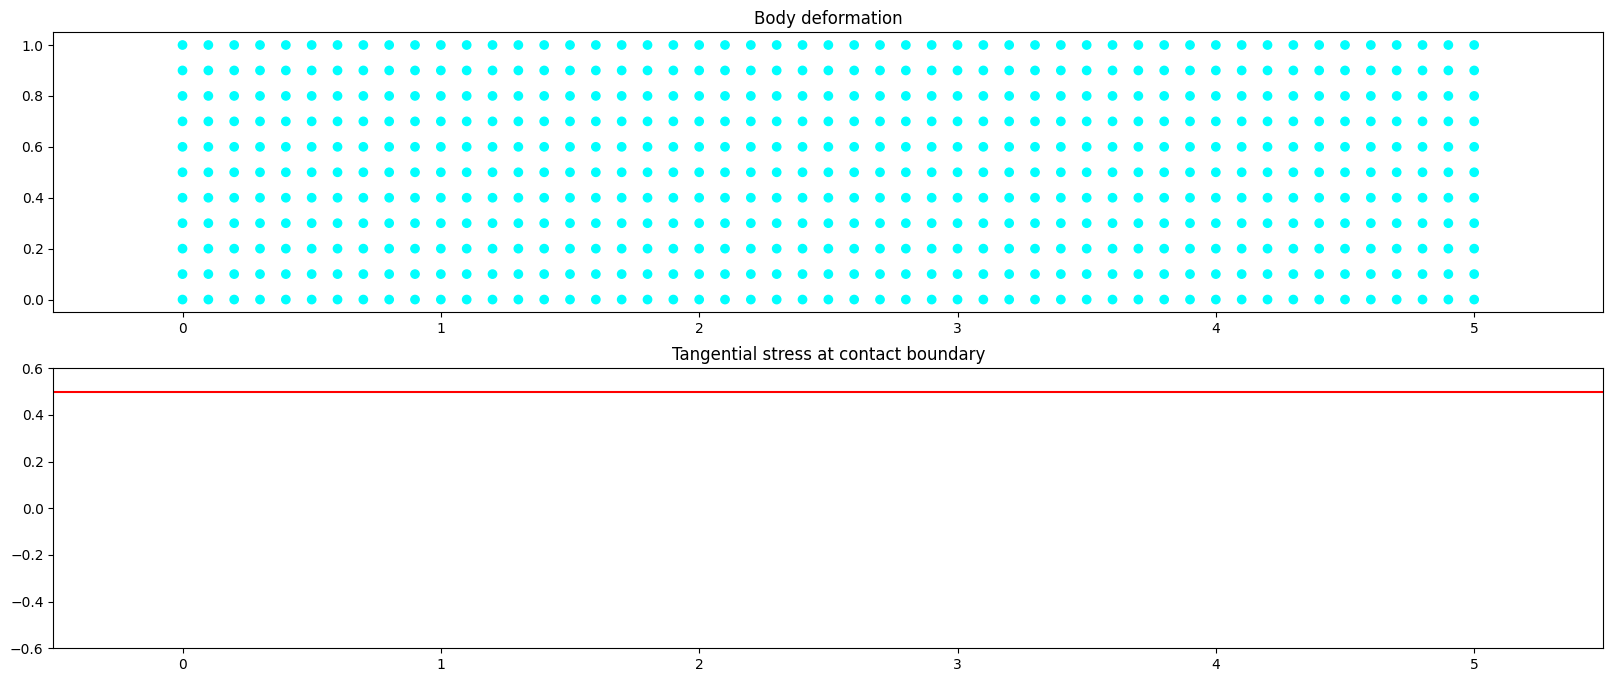

In [75]:
from matplotlib.animation import FuncAnimation

fig, axs = plt.subplots(2, figsize=(20, 8))


def animation(i):
    axs[0].clear()
    axs[1].clear()
    u = ut[i]
    if i != 0:
        up = ut[i - 1]
    else:
        up = np.zeros_like(u)
    dx = 0.1
    dy = 0.1

    xi, yi = np.arange(0, 5 + dx, dx), np.arange(0, 1 + dy, dy)
    xxi, yyi = np.meshgrid(xi, yi)
    u_fun_x, u_fun_y = get_interpolated(u, vertices)
    up_fun_x, up_fun_y = get_interpolated(up, vertices)
    u_xi = u_fun_x(xxi, yyi)
    u_yi = u_fun_y(xxi, yyi)
    w_xi = (u_xi - up_fun_x(xxi, yyi)) / dt
    w_yi = (u_yi - up_fun_y(xxi, yyi)) / dt

    stress = constitutive_law(u_xi, u_yi, mi, lambda_, dx, dy) + constitutive_law(w_xi, w_yi, mi_prime, lambda_prime,
                                                                                  dx, dy)
    c = np.linalg.norm(stress, axis=(0, 1))
    x_new = xxi + u_xi
    y_new = yyi + u_yi
    axs[0].set_title("Norm of stress tensor")
    axs[0].set_xlim(-0.5, 5.5)
    axs[0].scatter(x_new, y_new, marker='o', cmap='cool', c=c.reshape(*xxi.shape))
    axs[1].set_title("Tangential component of stress at contact boundary")
    axs[1].set_xlim(-0.5, 5.5)
    axs[1].set_ylim(-0.6, 0.6)
    axs[1].plot([-0.5, 5.5], [b, b], c='r')
    axs[1].bar(np.linspace(0, np.max(x_new), len(stress[1, 0, yyi.flatten() == 0])), -stress[1, 0, yyi.flatten() == 0],
               width=0.05)


ani = FuncAnimation(fig, animation, frames=50, interval=50, repeat=False)

animation(0)

In [76]:
from matplotlib.animation import ImageMagickWriter

ani.save('animation-schur2.gif', writer=ImageMagickWriter(fps=10))

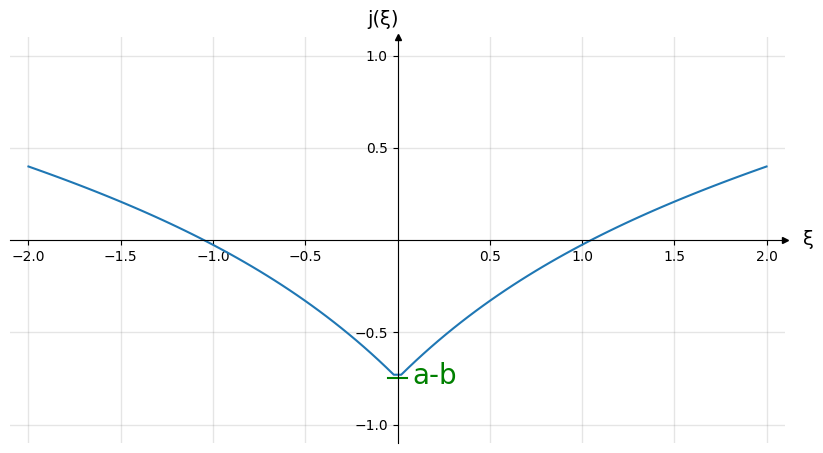

In [417]:
args = np.linspace(-2, 2, 100)
fig, ax = plt.subplots(figsize=(10, 10))

xmin, xmax = -2, 2
ymin, ymax = -1, 1

ax.set(xlim=(xmin - 0.1, xmax + 0.1), ylim=(ymin - 0.1, ymax + 0.1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('ξ', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('j(ξ)', size=14, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax + 0.1, 0.5)
y_ticks = np.arange(ymin, ymax + 0.1, 0.5)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect in this example with ticks_frequency=1
ax.set_xticks(np.arange(xmin, xmax + 1), minor=True)
ax.set_yticks(np.arange(ymin, ymax + 1), minor=True)

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
ax.text(0.08, 5 * (a - b) - 0.03, "a-b", {"color": "g", "fontsize": 20})
ax.plot([-0.05, 0.05], [5 * (a - b)] * 2, c="g")
# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
plt.plot(args, 5 * subdiff_function(args))
plt.savefig("fun.png")

In [407]:
def subdiff(x, a, b):
    return ((b - a) * np.exp(-np.abs(x)) + a) * np.sign(x)

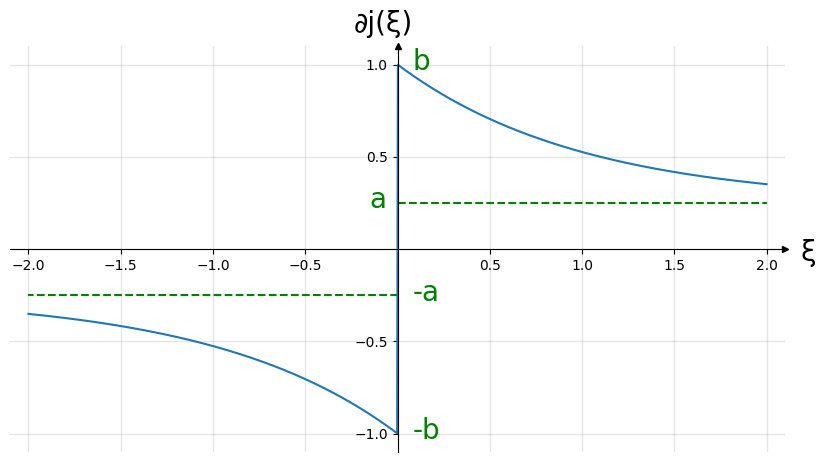

In [415]:
a = 0.05
b = 0.2
args = np.linspace(-2, 2, 1000)
fig, ax = plt.subplots(figsize=(10, 10))

xmin, xmax = -2, 2
ymin, ymax = -1, 1

ax.set(xlim=(xmin - 0.1, xmax + 0.1), ylim=(ymin - 0.1, ymax + 0.1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('ξ', size=20, labelpad=-24, x=1.03)
ax.set_ylabel('∂j(ξ)', size=20, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax + 0.1, 0.5)
y_ticks = np.arange(ymin, ymax + 0.1, 0.5)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect in this example with ticks_frequency=1
ax.set_xticks(np.arange(xmin, xmax + 1), minor=True)
ax.set_yticks(np.arange(ymin, ymax + 1), minor=True)

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
ax.text(0.08, 5 * (-a) - 0.03, "-a", {"color": "g", "fontsize": 20})
ax.text(0.08, 5 * (-b) - 0.03, "-b", {"color": "g", "fontsize": 20})
ax.plot([0, 2], [5 * a] * 2, 'g--')
ax.text(-0.15, 5 * a - 0.03, "a", {"color": "g", "fontsize": 20})
ax.text(0.08, 5 * b - 0.03, "b", {"color": "g", "fontsize": 20})
ax.plot([0, -2], [-5 * a] * 2, 'g--')

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
plt.plot(args, subdiff(args, 5 * a, 5 * b))
plt.savefig("subdiff.png")